In [73]:
import sys
import os
import time
import random
import json
from datetime import timezone, datetime
import string
import uuid
from uuid import UUID
import pandas as pd
import seaborn as sns
from elasticsearch_dsl import Search

In [74]:
def random_generator(size=6, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for x in range(size))

from elasticsearch import Elasticsearch
es = Elasticsearch()

read_readings={}

In [75]:
total_docs=0
j=0
itr=0
MAX_ITR=30
startf = datetime.now();

while itr<MAX_ITR: 
    start = datetime.now();
    for index in range(100000000000):
        
        try:
            
            vmid1="vm"+random_generator(2,'1234')
            
            #Query with Filering the data improves the performance..
            
            s = Search(using=es, index="elastic_perf") \
            .filter("term", logtype="xxy") \
            .query("match", vmid=vmid1)   \
            
            response = s.execute()
            
            
            #Without Adding the Filter Performance of the Read is Low.
            #res = es.search(index="elastic_perf1",body={"from":0,"size":1000,"query": {"match": {"vmid":vmid1}}})
            #print("%d documents found" % res['hits']['total'])
            timec=int((datetime.now() - start).total_seconds())

            if timec==1:
                j=j+1
                itr=itr+1
                read_readings[j]=index
                total_docs=total_docs + index
                break
                   
        except:
            print ('Unexpected error:', sys.exc_info()[0], ', for index ', index)
            raise
            
print ('Read',total_docs, ' in ', (datetime.now() - startf).total_seconds(), 's')
print ('average read per second is :',total_docs/10)

Read 8929  in  30.05706 s
average read per second is : 892.9


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcac23cec50>],
      dtype=object)

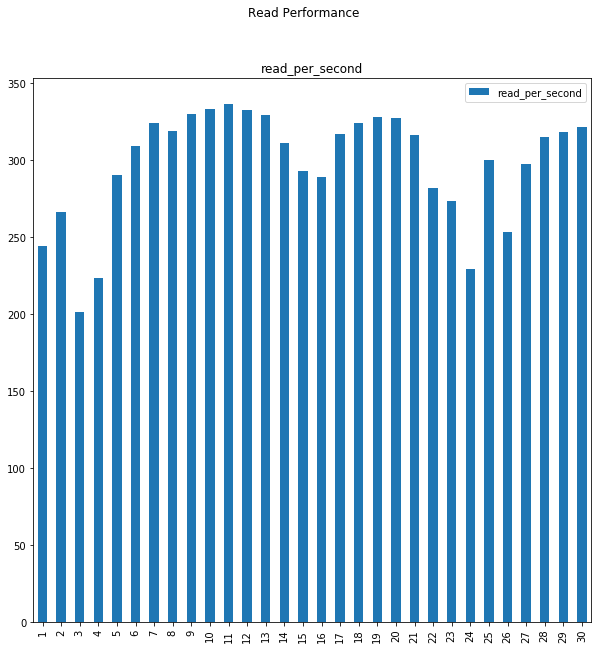

In [76]:
producer_df = pd.DataFrame.from_dict(read_readings, orient='index').rename(columns={0: 'read_per_second'})
producer_df.sort_index(inplace=True)
producer_df
producer_df.plot(kind='bar', subplots=True, figsize=(10, 10), title="Read Performance")